In [1]:
import scvelo as scv
import loompy
import velocyto as vcy
import pandas as pd
import scanpy as sc
scv.logging.print_version()
print(loompy.__version__)

Running scvelo 0.2.4 (python 3.9.6) on 2022-05-20 13:07.
3.0.7


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI's XMLRPC API is currently disabled due to unmanageable load and will be deprecated in the near future. See https://status.python.org/ for more information.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

In [3]:
adata = scv.read_loom("/home/stat/kevinl1/project/Multiome_fate/out/kevin/Writeup4c/2022_04_DABTRAM_onlyRNA_labeled.loom")

In [4]:
adata

AnnData object with n_obs × n_vars = 24240 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [5]:
adata.obs['clusters'] = pd.Categorical(adata.obs['clusters'])

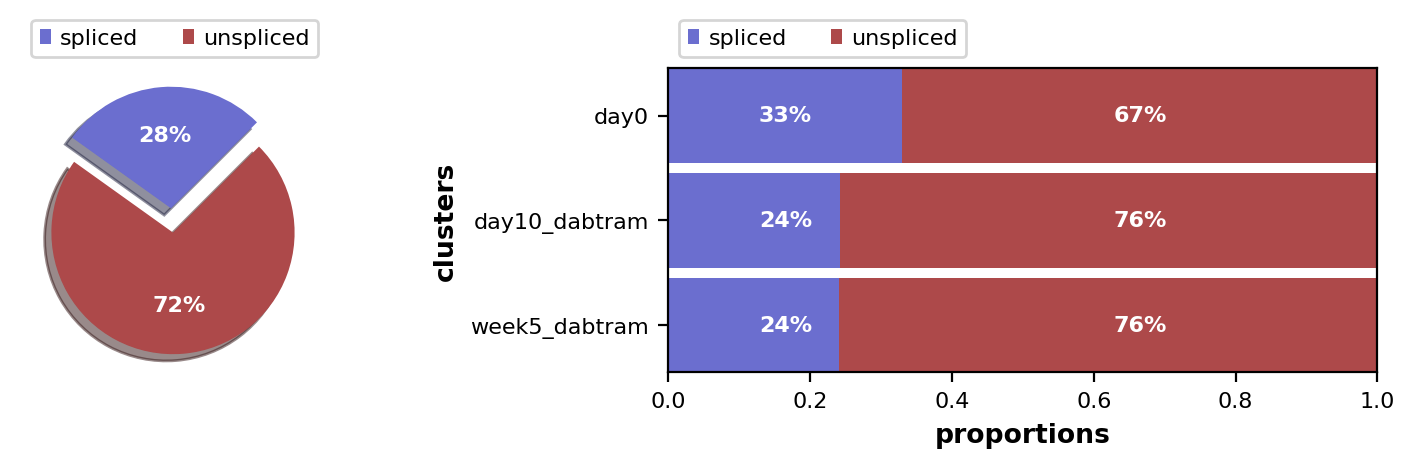

In [6]:
scv.pl.proportions(adata)

In [8]:
adata.layers["spliced"]

<24240x32738 sparse matrix of type '<class 'numpy.uint16'>'
	with 2366185 stored elements in Compressed Sparse Row format>

In [12]:
adata.layers["spliced"][1:5,1:5].A

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint16)

In [13]:
adata.var["Accession"]

Gene
FAM138A          ENSG00000237613
RP11-34P13.7     ENSG00000238009
RP11-34P13.8     ENSG00000239945
AL627309.1       ENSG00000237683
RP11-34P13.14    ENSG00000239906
                      ...       
BPY2B            ENSG00000183795
DAZ4             ENSG00000205916
CSPG4P1Y         ENSG00000240450
CDY1             ENSG00000172288
TTTY3            ENSG00000231141
Name: Accession, Length: 32738, dtype: object

In [22]:
 adata.obs_vector

<bound method AnnData.obs_vector of AnnData object with n_obs × n_vars = 24240 × 32738
    obs: 'Clusters', '_X', '_Y', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'>

In [25]:
 adata.obs_vector("PCDH7",  layer="spliced")

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

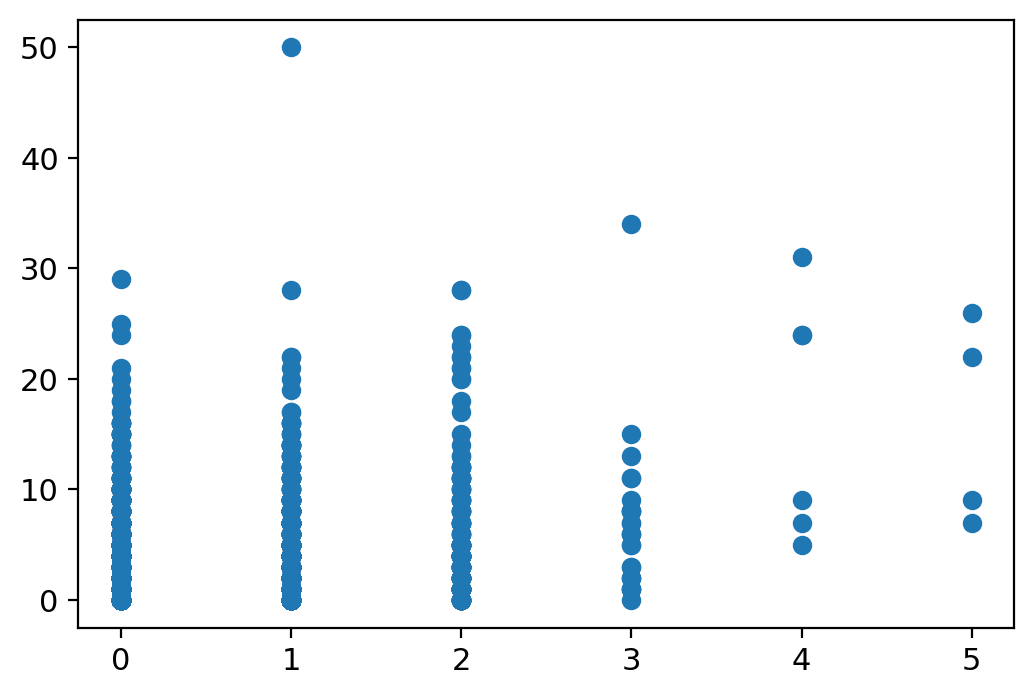

In [27]:
vec1 = adata.obs_vector("PCDH7", layer="spliced")
vec2 = adata.obs_vector("PCDH7", layer="unspliced")
plt.scatter(vec1, vec2)

In [28]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 30116 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


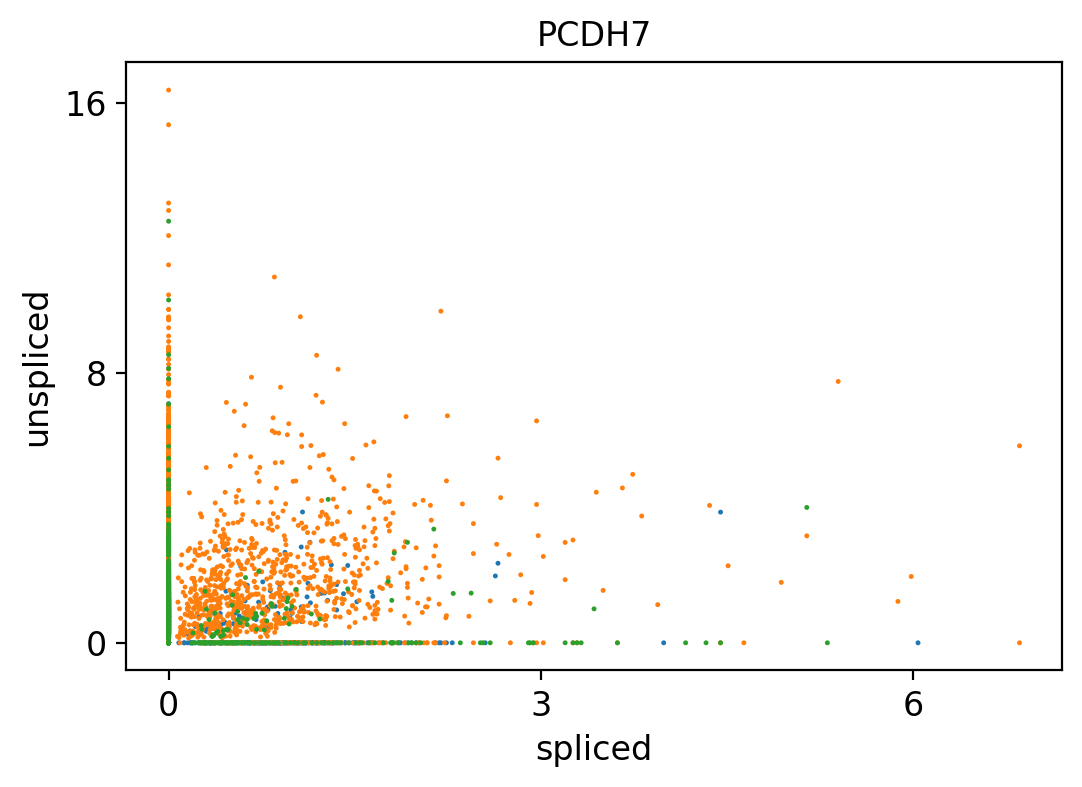

In [29]:
scv.pl.scatter(adata, 'PCDH7')

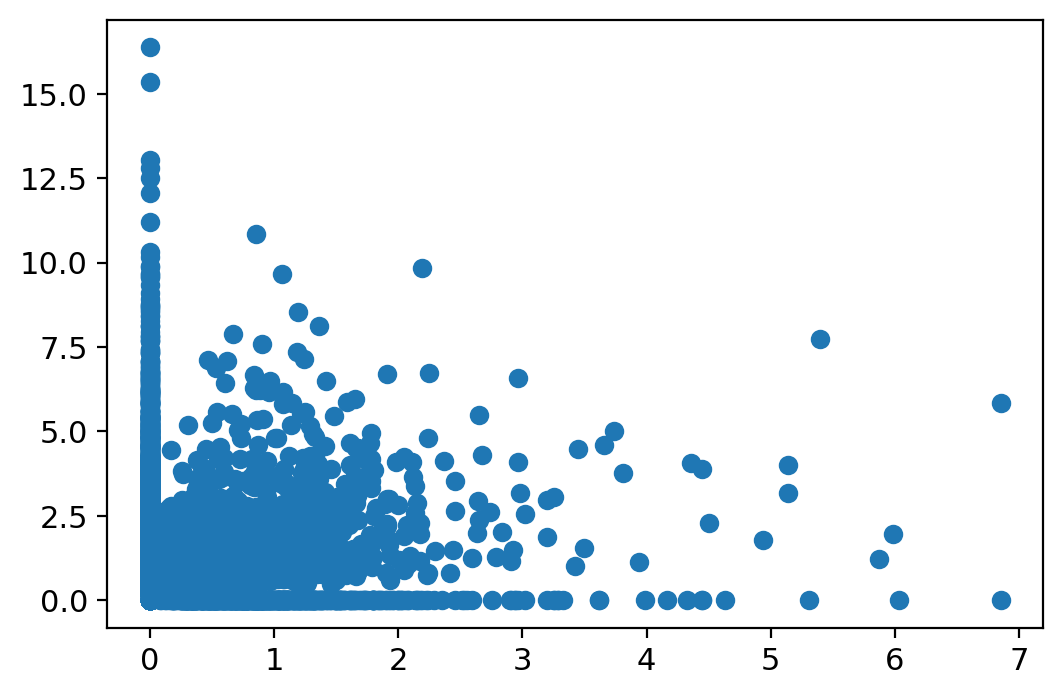

In [30]:
vec1 = adata.obs_vector("PCDH7", layer="spliced")
vec2 = adata.obs_vector("PCDH7", layer="unspliced")
plt.scatter(vec1, vec2)

In [35]:
 np.quantile(adata.obs_vector("PCDH7",  layer="spliced"), (0.5,0.75,0.9,0.95,1))

array([0.        , 0.        , 0.        , 0.43208467, 6.85416651])

In [36]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:22) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


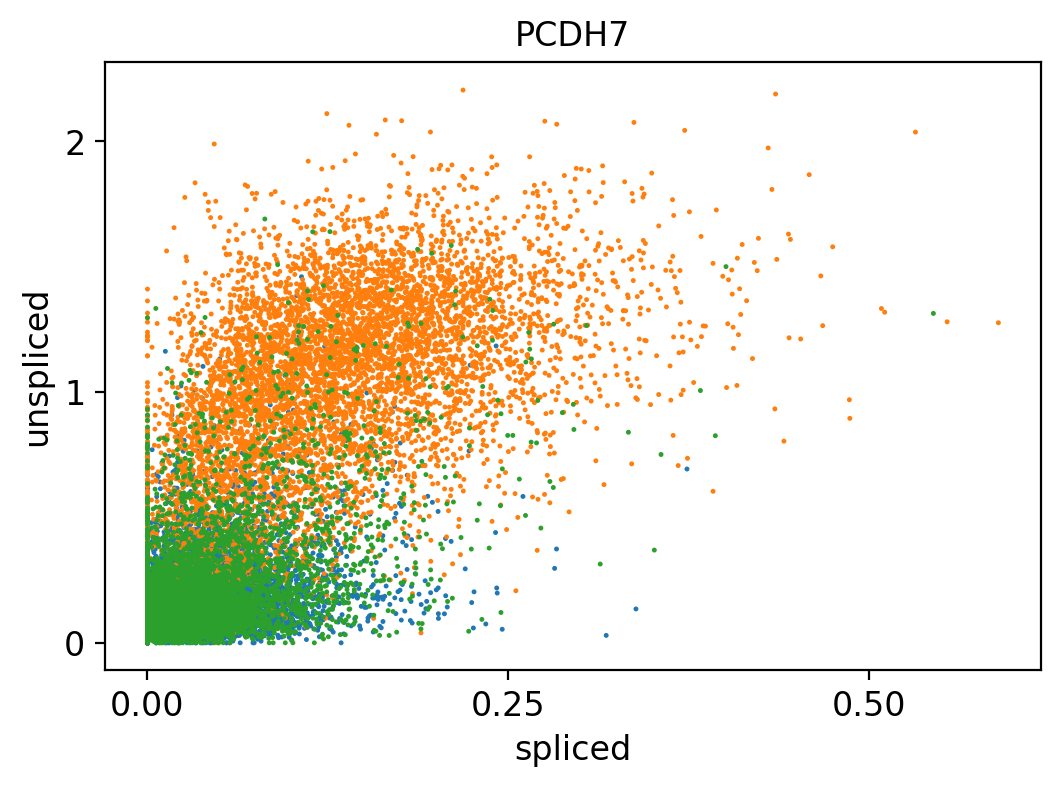

In [37]:
scv.pl.scatter(adata, 'PCDH7')

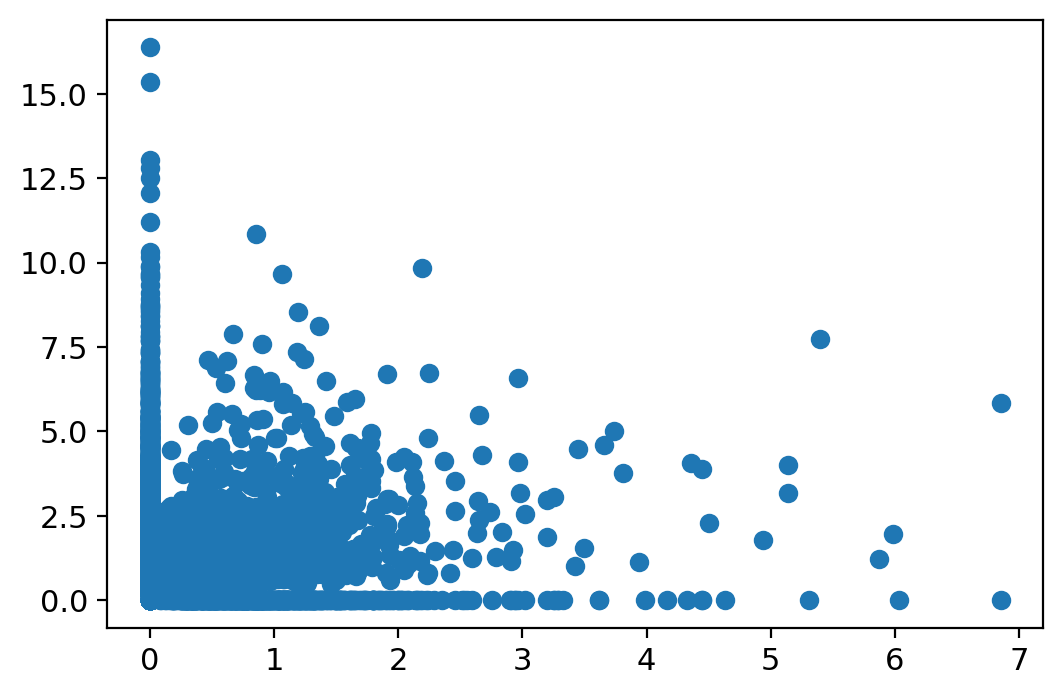

In [38]:
vec1 = adata.obs_vector("PCDH7", layer="spliced")
vec2 = adata.obs_vector("PCDH7", layer="unspliced")
plt.scatter(vec1, vec2)

In [39]:
adata

AnnData object with n_obs × n_vars = 24240 × 2000
    obs: 'Clusters', '_X', '_Y', 'clusters', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'clusters_colors', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

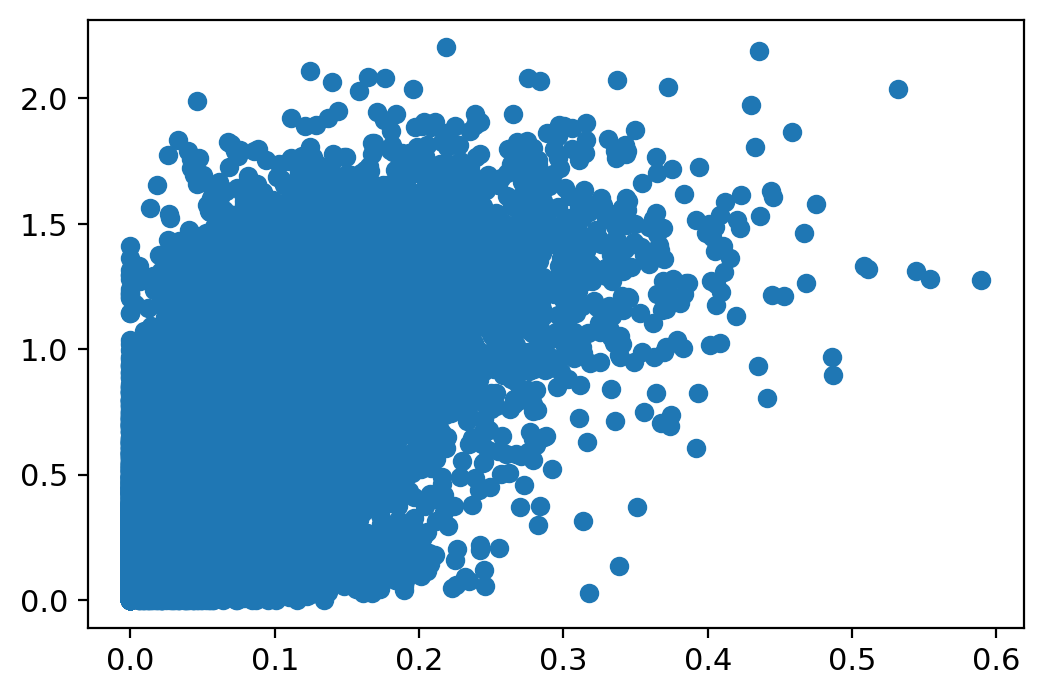

In [40]:
vec1 = adata.obs_vector("PCDH7", layer="Ms")
vec2 = adata.obs_vector("PCDH7", layer="Mu")
plt.scatter(vec1, vec2)